In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from utils import calculate_qscore

# Load data

In [2]:
dataset_file = "data/labels/processed/global_mapped_cleaned.csv"  # full dataset
metadata_file = "data/svi/metadata.csv"
save_file = "spatial-differences"

In [6]:
raw_df = pd.read_csv(dataset_file, index_col=0)
metadata_df = pd.read_csv(metadata_file, index_col=0)

In [9]:
scores_df = calculate_qscore(raw_df)
survey_df = pd.merge(
    scores_df, metadata_df, left_on="Image", right_on="Image number", how="left"
)

assert (
    survey_df.shape[0] == 400 * 10
), "There must be as many rows as num. of SVIs times num. of questions"
survey_df["Score"] = round(survey_df["Score"], 2)
survey_df = survey_df.drop(["Relabelled Name", "Image", "Image number"], axis=1)
survey_df.loc[:, "Dataset"] = "Survey"
survey_df

,Question,Score,Num_comparisons,uuid,city,Dataset
0,safe,5.32,28,76d51909-0a1e-4a6b-b0bc-ef9e5d1781ab,Singapore,Survey
1,safe,5.24,29,94ed8a77-577f-4064-ab7f-ae55b864b674,San Francisco,Survey
2,safe,4.18,28,8cb95370-8b07-4e81-a903-977d060fd48a,San Francisco,Survey
3,safe,4.85,32,11afd5fb-986b-4919-97d6-e13795916ad7,Santiago,Survey
4,safe,6.10,30,b33ead6f-e7e3-4d60-befe-def6a70c5468,Amsterdam,Survey
...,...,...,...,...,...,...
3995,green,4.59,22,44fb3166-93d7-4606-89d4-3fb8e2b50e8d,Santiago,Survey
3996,green,3.60,18,eba4da21-0dcc-4e1c-9b7e-8e0686f1b25f,Santiago,Survey
3997,green,5.11,27,3ad99f11-e7e6-4733-95f1-ce9942a444ee,San Francisco,Survey
3998,green,4.56,29,70f06427-febf-473e-93f1-e8c2033be895,Abuja,Survey


In [14]:
# add a city that comprises all responses, which is basically the same dataset with city replaced
aux_df = survey_df.copy()
aux_df['city'] = 'All'
survey_df = pd.concat([survey_df, aux_df], ignore_index=True)
survey_df

,Question,Score,Num_comparisons,uuid,city,Dataset
0,safe,5.32,28,76d51909-0a1e-4a6b-b0bc-ef9e5d1781ab,Singapore,Survey
1,safe,5.24,29,94ed8a77-577f-4064-ab7f-ae55b864b674,San Francisco,Survey
2,safe,4.18,28,8cb95370-8b07-4e81-a903-977d060fd48a,San Francisco,Survey
3,safe,4.85,32,11afd5fb-986b-4919-97d6-e13795916ad7,Santiago,Survey
4,safe,6.10,30,b33ead6f-e7e3-4d60-befe-def6a70c5468,Amsterdam,Survey
...,...,...,...,...,...,...
7995,green,4.59,22,44fb3166-93d7-4606-89d4-3fb8e2b50e8d,All,Survey
7996,green,3.60,18,eba4da21-0dcc-4e1c-9b7e-8e0686f1b25f,All,Survey
7997,green,5.11,27,3ad99f11-e7e6-4733-95f1-ce9942a444ee,All,Survey
7998,green,4.56,29,70f06427-febf-473e-93f1-e8c2033be895,All,Survey


In [15]:
cities = survey_df["city"].unique()
num_cities = len(cities)

indicators = survey_df["Question"].unique()
num_indicators = len(indicators)

# PlacePulse2.0 inferences

We use the same [model](https://github.com/ualsg/global-streetscapes/blob/main/code/model_training/perception/inference.py) used in the [Global Streetscapes dataset](https://github.com/ualsg/global-streetscapes/wiki/4b-Human-perception).

Run the next cells after having run `8_inference.py` as indicated in the `README.MD` file

In [16]:
indicators_pp2 = ["safe", "lively", "wealthy", "beautiful", "boring", "depressing"]
num_indicators_pp2 = len(indicators_pp2)
for i, ind in enumerate(indicators_pp2):
    if i == 0:
        df_pp2_raw = pd.read_csv(f"data/labels/inferences/{ind}.csv")
    else:
        df_pp2_raw = pd.merge(
            df_pp2_raw,
            pd.read_csv(f"data/labels/inferences/{ind}.csv"),
            on="uuid",
            how="left",
        )

df_pp2_raw

,uuid,safe,lively,wealthy,beautiful,boring,depressing
0,dc6eee81-9513-4edb-813b-05b83b5127be,2.95,4.59,5.12,6.71,3.70,6.67
1,50811b7a-5b0f-4581-92fa-017e6ff26ba0,7.58,9.07,8.57,6.93,2.10,2.03
2,35c8af9e-5e36-4810-9824-59b9b273fbcf,1.94,6.52,1.15,1.23,6.14,8.50
3,3a439403-305b-4be7-ba43-f8ff8e75c31c,3.07,5.93,4.13,5.59,1.99,4.85
4,3cc24150-c590-4d83-883c-44855010e338,5.55,4.82,7.42,8.03,4.71,2.58
...,...,...,...,...,...,...,...
395,dad8c5a5-80cd-4d1e-a3cc-b429cdbb90c2,8.61,8.63,7.31,4.99,1.14,5.09
396,b7abb7f7-7031-4fc9-8f16-7e591dcdfbce,7.65,8.11,7.95,7.61,8.56,2.03
397,41a8b6ce-02df-47e8-b7d1-10cce55b6575,5.81,7.53,8.73,9.13,2.67,1.62
398,e97e0042-0ca3-47a2-a514-7422cb60e6a6,5.94,6.97,8.34,5.54,4.52,5.69


In [17]:
df_pp2 = pd.melt(
    df_pp2_raw,
    id_vars=["uuid"],
    value_vars=["safe", "lively", "wealthy", "beautiful", "boring", "depressing"],
    var_name="Question",
    value_name="Score",
)
df_pp2 = pd.merge(df_pp2, metadata_df, on='uuid', how='left')
df_pp2 = df_pp2.drop(["Relabelled Name", "Image number"], axis=1)
df_pp2["Dataset"] = "ViT-PP2"
df_pp2

,uuid,Question,Score,city,Dataset
0,dc6eee81-9513-4edb-813b-05b83b5127be,safe,2.95,Santiago,ViT-PP2
1,50811b7a-5b0f-4581-92fa-017e6ff26ba0,safe,7.58,Santiago,ViT-PP2
2,35c8af9e-5e36-4810-9824-59b9b273fbcf,safe,1.94,Santiago,ViT-PP2
3,3a439403-305b-4be7-ba43-f8ff8e75c31c,safe,3.07,Santiago,ViT-PP2
4,3cc24150-c590-4d83-883c-44855010e338,safe,5.55,Santiago,ViT-PP2
...,...,...,...,...,...
2395,dad8c5a5-80cd-4d1e-a3cc-b429cdbb90c2,depressing,5.09,Amsterdam,ViT-PP2
2396,b7abb7f7-7031-4fc9-8f16-7e591dcdfbce,depressing,2.03,Amsterdam,ViT-PP2
2397,41a8b6ce-02df-47e8-b7d1-10cce55b6575,depressing,1.62,Amsterdam,ViT-PP2
2398,e97e0042-0ca3-47a2-a514-7422cb60e6a6,depressing,5.69,Amsterdam,ViT-PP2


In [18]:
# add a city that comprises all responses, which is basically the same dataset with city replaced
aux_df = df_pp2.copy()
aux_df['city'] = 'All'
df_pp2 = pd.concat([df_pp2, aux_df], ignore_index=True)
df_pp2

,uuid,Question,Score,city,Dataset
0,dc6eee81-9513-4edb-813b-05b83b5127be,safe,2.95,Santiago,ViT-PP2
1,50811b7a-5b0f-4581-92fa-017e6ff26ba0,safe,7.58,Santiago,ViT-PP2
2,35c8af9e-5e36-4810-9824-59b9b273fbcf,safe,1.94,Santiago,ViT-PP2
3,3a439403-305b-4be7-ba43-f8ff8e75c31c,safe,3.07,Santiago,ViT-PP2
4,3cc24150-c590-4d83-883c-44855010e338,safe,5.55,Santiago,ViT-PP2
...,...,...,...,...,...
4795,dad8c5a5-80cd-4d1e-a3cc-b429cdbb90c2,depressing,5.09,All,ViT-PP2
4796,b7abb7f7-7031-4fc9-8f16-7e591dcdfbce,depressing,2.03,All,ViT-PP2
4797,41a8b6ce-02df-47e8-b7d1-10cce55b6575,depressing,1.62,All,ViT-PP2
4798,e97e0042-0ca3-47a2-a514-7422cb60e6a6,depressing,5.69,All,ViT-PP2


In [19]:
min_threshold = 22  # 4 was used in PP2, 22 is stable
survey_df_filtered = survey_df[survey_df["Num_comparisons"] >= min_threshold]
# merge PP2 scores with SVI city of origin
merged_df = pd.concat([survey_df_filtered, df_pp2], ignore_index=True)
merged_df.to_csv(f'data/labels/processed/{save_file}-{min_threshold}.csv')
merged_df

,Question,Score,Num_comparisons,uuid,city,Dataset
0,safe,5.32,28.0,76d51909-0a1e-4a6b-b0bc-ef9e5d1781ab,Singapore,Survey
1,safe,5.24,29.0,94ed8a77-577f-4064-ab7f-ae55b864b674,San Francisco,Survey
2,safe,4.18,28.0,8cb95370-8b07-4e81-a903-977d060fd48a,San Francisco,Survey
3,safe,4.85,32.0,11afd5fb-986b-4919-97d6-e13795916ad7,Santiago,Survey
4,safe,6.10,30.0,b33ead6f-e7e3-4d60-befe-def6a70c5468,Amsterdam,Survey
...,...,...,...,...,...,...
10723,depressing,5.09,NaN,dad8c5a5-80cd-4d1e-a3cc-b429cdbb90c2,All,ViT-PP2
10724,depressing,2.03,NaN,b7abb7f7-7031-4fc9-8f16-7e591dcdfbce,All,ViT-PP2
10725,depressing,1.62,NaN,41a8b6ce-02df-47e8-b7d1-10cce55b6575,All,ViT-PP2
10726,depressing,5.69,NaN,e97e0042-0ca3-47a2-a514-7422cb60e6a6,All,ViT-PP2


# Scores by all raters for each City's SVI

Min sample size across all indicators: 51


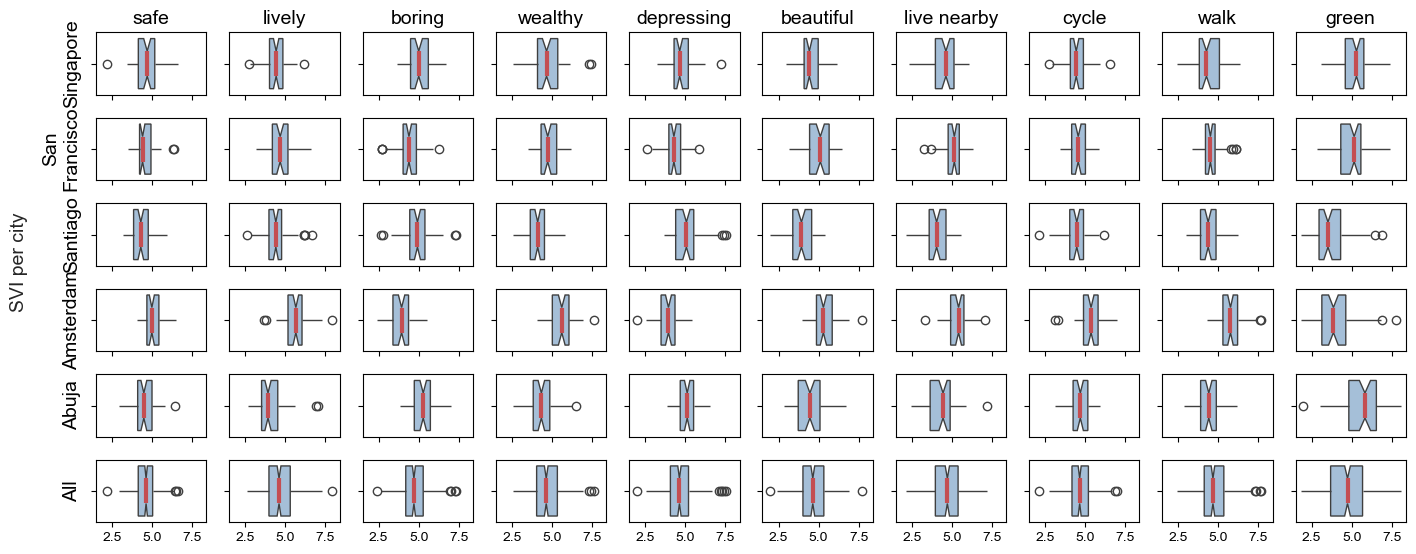

In [20]:
min_sample_size = 100

fig, axes = plt.subplots(
    num_cities, num_indicators, figsize=(14, 6), sharey=True, sharex=True
)

sns.set(style="white")
fontsize = 14

plot_args = {
    "notch": True,
    "showcaps": False,
    "boxprops": {"facecolor": (0.3, 0.5, 0.7, 0.5)},
    "medianprops": {"color": "r", "linewidth": 3},
}

for j, c in enumerate(cities):
    dataset_df = merged_df[merged_df['Dataset'] == 'Survey']
    city_df_scores = dataset_df[dataset_df["city"] == c]

    for i, ind in enumerate(indicators):
        # Filter by indicator
        ind_df = city_df_scores[city_df_scores["Question"] == ind]

        ax = axes[j, i]  # Use the shared axes
        sns.boxplot(
            x=ind_df["Score"],
            ax=ax,
            **plot_args,
        )

        if min_sample_size > len(ind_df):
            min_sample_size = len(ind_df)

        if j == 0:
            ax.set_title(f"{ind}", size=fontsize)
        ax.set_xlabel("")
        if c == "San Francisco":
            c = "San\nFrancisco"
        ax.set_ylabel(c, size=fontsize)

# Add a shared y-axis label
print(f"Min sample size across all indicators: {min_sample_size}")
fig.text(
    -0.01, 0.5, "SVI per city", va="center", rotation="vertical", fontsize=fontsize
)
# For the plot above there are only 80 data points per cell
plt.savefig("img/comparison_svi_per_city_.png", dpi=300)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to leave space for suptitle
plt.show()

# Scores by all raters for each City's SVI and PP2

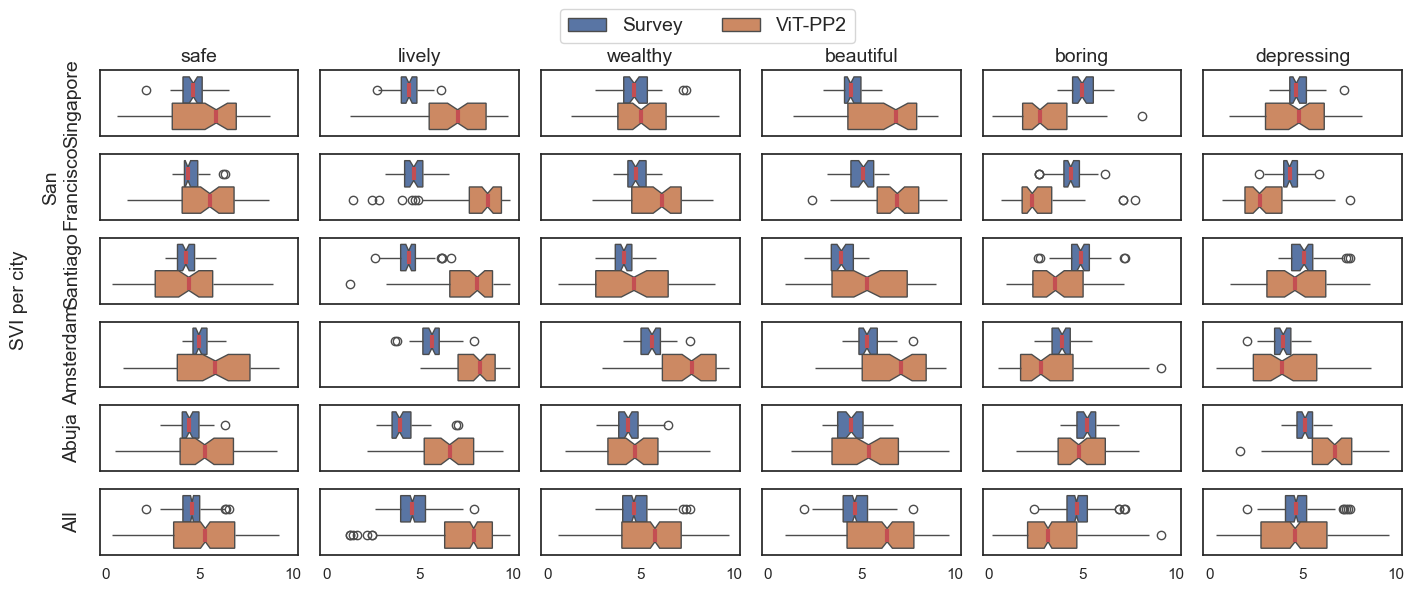

In [21]:
fig, axes = plt.subplots(
    num_cities, num_indicators_pp2, figsize=(14, 6), sharey=True, sharex=True
)

sns.set(style="white")
fontsize = 14

plot_args = {
    "notch": True,
    "showcaps": False,
    # 'boxprops': {"facecolor": (.3, .5, .7, .5)},
    "medianprops": {"color": "r", "linewidth": 3},
}

for j, c in enumerate(cities):
    city_df_scores = merged_df[merged_df["city"] == c]
    for i, ind in enumerate(indicators_pp2):
        # Filter by indicator
        ind_df = city_df_scores[city_df_scores["Question"] == ind]

        ax = axes[j, i]  # Use the shared axes
        # survey
        sns.boxplot(
            data=ind_df,
            x="Score",
            ax=ax,
            **plot_args,
            hue='Dataset',
        )

        # Get handles and labels from the first subplot
        if j == 0 and i == 0:
            legend_handles, legend_labels = ax.get_legend_handles_labels()

        # Remove individual legends
        ax.legend_.remove()

        if j == 0:
            ax.set_title(f"{ind}", size=fontsize)
        ax.set_xlabel("")
        if c == "San Francisco":
            c = "San\nFrancisco"
        ax.set_ylabel(c, size=fontsize)

# Add a shared y-axis label
fig.text(
    -0.01, 0.5, "SVI per city", va="center", rotation="vertical", fontsize=fontsize
)

# Add a single shared legend
fig.legend(legend_handles, legend_labels, loc="upper center", ncol=2, fontsize=fontsize)

# Each box has 400 samples
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to leave space for suptitle
plt.savefig("img/comparison_svi_per_city_pp2.png", dpi=300)
plt.show()

In [ ]:
# obvious cities are not perceived the same
# again overestimation of PP2